In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
housing = pd.read_csv('newhousing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

std_scaler = StandardScaler()
housing_scaled = std_scaler.fit_transform(housing)
housing_n = pd.DataFrame(housing_scaled, index=housing.index, columns=housing.columns)
housing_n = round(housing_n,2)

X=housing_n.drop('price',axis=1)
y=housing_n['price']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [38]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
359,-0.88,-1.31,-0.57,-0.93,-2.47,2.15,-0.73,-0.22,-0.68,0.36,-0.55,-0.84,1.44,-0.24,0.34
19,0.92,0.05,1.42,-0.93,0.41,2.15,1.36,-0.22,1.47,1.52,-0.55,-0.84,1.44,0.67,1.38
159,0.79,0.05,-0.57,0.22,0.41,-0.47,-0.73,-0.22,1.47,1.52,1.80,-0.84,-0.70,0.56,-0.71
35,1.05,1.40,1.42,1.38,0.41,-0.47,-0.73,-0.22,1.47,1.52,1.80,-0.84,-0.70,0.04,0.34
28,-0.41,1.40,1.42,0.22,0.41,-0.47,-0.73,4.56,-0.68,-0.81,-0.55,1.18,-0.70,-0.90,0.34


<IPython.core.display.Javascript object>


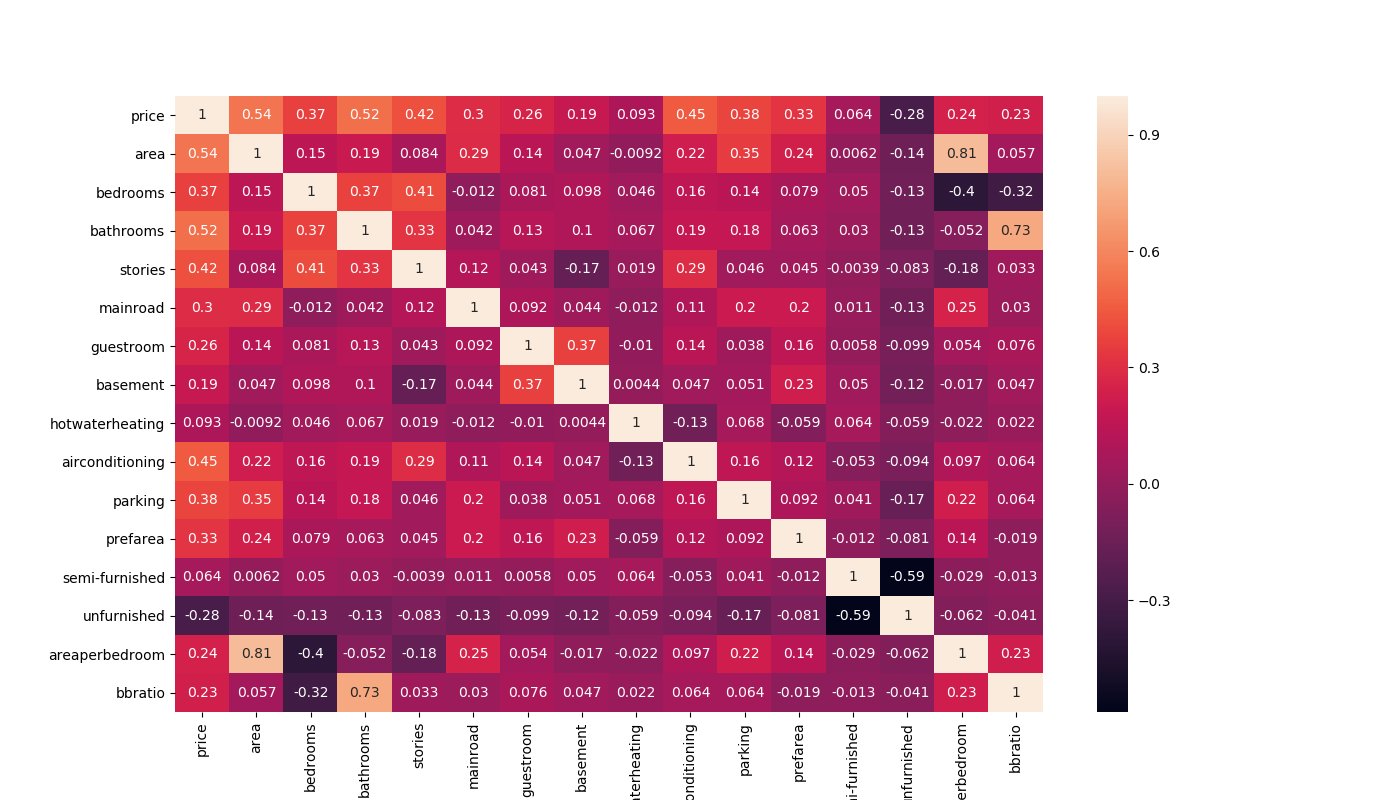

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(housing_n.corr(),annot = True)

In [40]:
housing_n.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,-0.000128,0.000110,0.000624,-0.000367,-0.002202,0.003101,-0.003688,0.002459,-0.000734,-0.001468,-0.000936,0.001927,0.001358,-0.001064,-0.000312,0.000514
std,1.000789,1.001034,1.000663,1.000014,1.000512,1.004068,1.003064,0.998084,1.000926,1.000137,1.003867,0.997110,0.996736,1.004521,1.000930,1.000478
min,-1.610000,-1.610000,-2.670000,-0.570000,-0.930000,-2.470000,-0.470000,-0.730000,-0.220000,-0.680000,-0.810000,-0.550000,-0.840000,-0.700000,-1.720000,-1.760000
25%,-0.720000,-0.720000,-1.310000,-0.570000,-0.930000,0.410000,-0.470000,-0.730000,-0.220000,-0.680000,-0.810000,-0.550000,-0.840000,-0.700000,-0.690000,-0.710000
50%,-0.230000,-0.250000,0.050000,-0.570000,0.220000,0.410000,-0.470000,-0.730000,-0.220000,-0.680000,-0.810000,-0.550000,-0.840000,-0.700000,-0.180000,-0.290000
75%,0.520000,0.560000,0.050000,1.420000,0.220000,0.410000,-0.470000,1.360000,-0.220000,1.470000,0.360000,-0.550000,1.180000,1.440000,0.430000,0.340000
max,4.570000,5.100000,4.120000,5.410000,2.530000,0.410000,2.150000,1.360000,4.560000,1.470000,2.680000,1.800000,1.180000,1.440000,5.700000,3.470000


In [41]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     54.00
Date:                Sun, 12 Aug 2018   Prob (F-statistic):           6.04e-83
Time:                        15:02:32   Log-Likelihood:                -317.74
No. Observations:                 381   AIC:                             667.5
Df Residuals:                     365   BIC:                             730.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0100      0.029     

In [44]:
from sklearn.metrics import mean_squared_error

X_test = sm.add_constant(X_test)
y_pred = lm_1.predict(X_test)
mean_squared_error(y_test,y_pred)

0.34686603218656065

In [45]:
from sklearn.decomposition import PCA

pca = PCA(random_state=100)
pca.fit(X_train)
pca.components_

array([[-0.00000000e+00,  4.88567869e-01,  1.25815927e-01,
         2.88241683e-01,  1.71258266e-01,  3.25866362e-01,
         1.77354467e-01,  1.37019328e-01,  3.70662649e-03,
         2.46296264e-01,  3.52982796e-01,  2.33156947e-01,
         1.14950340e-01, -2.48414320e-01,  3.54743953e-01,
         1.90368608e-01],
       [-0.00000000e+00,  2.43788867e-01, -5.01901786e-01,
        -3.15702734e-01, -3.89134141e-01,  1.32421207e-01,
        -6.15668377e-02, -5.28112317e-02, -1.32742601e-01,
        -1.17677900e-01,  3.67297602e-02,  2.83208168e-02,
        -2.52511264e-01,  2.63953396e-01,  4.95580547e-01,
         2.82819498e-02],
       [ 0.00000000e+00, -5.98795358e-02, -9.83194107e-02,
         4.96055420e-01,  1.65079087e-01, -6.20150790e-02,
        -6.52721135e-02, -2.54506939e-01,  6.62748735e-02,
        -1.34031701e-02,  4.40546306e-02, -2.59726203e-01,
        -3.53867776e-01,  3.29804642e-01, -5.87647063e-03,
         5.76668880e-01],
       [ 0.00000000e+00, -1.05109594e

In [47]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,Feature,PC1,PC2
0,const,-0.000000,-0.000000
1,area,0.488568,0.243789
2,bedrooms,0.125816,-0.501902
3,bathrooms,0.288242,-0.315703
4,stories,0.171258,-0.389134
5,mainroad,0.325866,0.132421
6,guestroom,0.177354,-0.061567
7,basement,0.137019,-0.052811
8,hotwaterheating,0.003707,-0.132743
9,airconditioning,0.246296,-0.117678


In [49]:
pca.explained_variance_ratio_

array([0.17883787, 0.13459972, 0.10786657, 0.09841781, 0.08952294,
       0.07200353, 0.06435339, 0.055878  , 0.05447424, 0.04716785,
       0.03862968, 0.02966023, 0.02506796, 0.00235645, 0.00116375,
       0.        ])

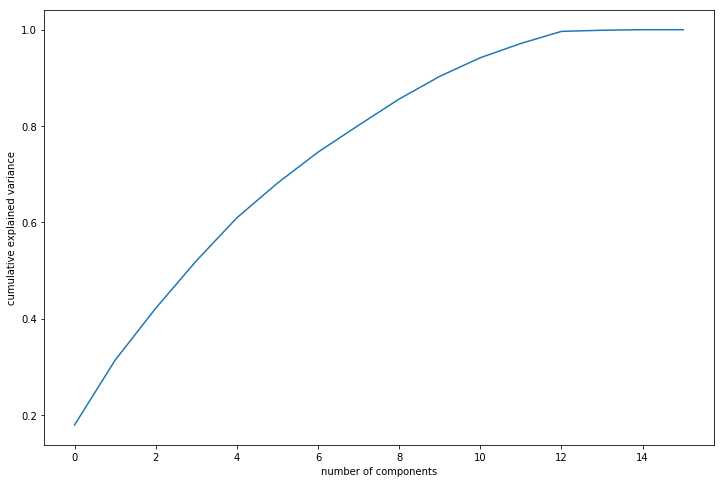

In [50]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [51]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.17883787 0.31343759 0.42130416 0.51972197 0.60924491 0.68124844
 0.74560183 0.80147983 0.85595407 0.90312193 0.94175161 0.97141183
 0.9964798  0.99883625 1.         1.        ]


In [52]:
X_train_pca = pca.transform(X_train)

D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


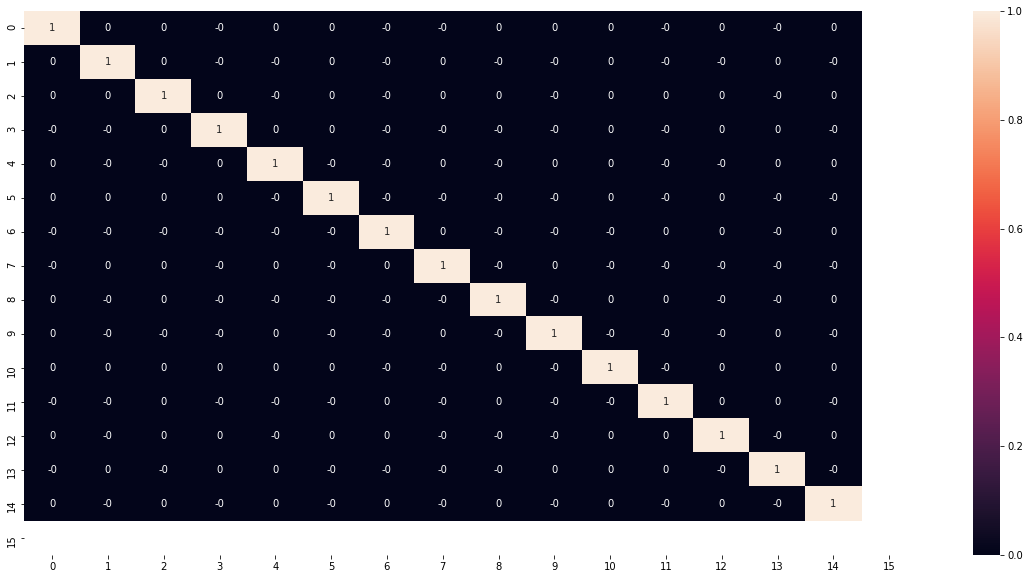

In [55]:
#plotting the correlation matrix
%matplotlib inline
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat = np.round(corrmat,2)
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [56]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(164, 16)

In [58]:
X_train_pca.shape

(381, 16)

In [62]:
lm_2 = sm.OLS(y_train,X_train_pca).fit()
y_pred_pca = lm_2.predict(X_test_pca)
round(mean_squared_error(y_test,y_pred_pca),2)

0.35

In [63]:
pca = PCA(n_components=6,random_state=100)
X_train_p2 = pca.fit_transform(X_train)
X_test_p2 = pca.transform(X_test)

lm_3 = sm.OLS(y_train,X_train_p2).fit()
y_p2 = lm_3.predict(X_test_p2)
round(mean_squared_error(y_test,y_p2),2)

0.33